In [2]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from numpy.random import permutation
from IPython.core.debugger import set_trace  
import seaborn as sns
import urllib.request
import io

np.random.seed(100)

# Data analyzing

In [3]:
# load dataset 
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"
url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
url3 = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names"

data0 = urllib.request.urlopen(url1)
data1 = arff.loadarff(io.StringIO(data0.read().decode('utf-8')))
#data1 = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data1[0])
data2 = pd.read_csv(url2, header=None)

print(df)
print(data2.shape)

        0    1     2     3     4  ...        15        16        17   18  Class
0     1.0  1.0  22.0  22.0  22.0  ...  0.003923  0.486903  0.100025  1.0   b'0'
1     1.0  1.0  24.0  24.0  22.0  ...  0.003903  0.520908  0.144414  0.0   b'0'
2     1.0  1.0  62.0  60.0  59.0  ...  0.007744  0.530904  0.128548  0.0   b'1'
3     1.0  1.0  55.0  53.0  53.0  ...  0.001531  0.483284  0.114790  0.0   b'0'
4     1.0  1.0  44.0  44.0  44.0  ...  0.000000  0.475935  0.123572  0.0   b'1'
...   ...  ...   ...   ...   ...  ...       ...       ...       ...  ...    ...
1146  1.0  1.0  34.0  34.0  34.0  ...  0.000000  0.537470  0.116795  0.0   b'0'
1147  1.0  1.0  49.0  49.0  49.0  ...  0.000000  0.516733  0.124190  0.0   b'0'
1148  1.0  0.0  49.0  48.0  48.0  ...  0.000000  0.560632  0.129843  0.0   b'0'
1149  1.0  1.0  39.0  36.0  29.0  ...  0.174584  0.485972  0.106690  1.0   b'1'
1150  1.0  1.0   7.0   7.0   7.0  ...  0.000000  0.556192  0.088957  0.0   b'0'

[1151 rows x 20 columns]
(155, 20)


In [4]:
# data preprocessing 
df =df[~df.eq('?').any(1)]
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df.columns = ['Class', 'quality_assessment','pre_screening','MA_detection_0.5','MA_detection_0.6','MA_detection_0.7','MA_detection_0.8','MA_detection_0.9','MA_detection_1.0','MA_normalized_1','MA_normalized_2','MA_normalized_3','MA_normalized_4','MA_normalized_5','MA_normalized_6','MA_normalized_7','MA_normalized_8','euclidean_distance','diameter','AM/FM-based_classification']
df2 =data2[~data2.eq('?').any(1)]
df2.columns = ['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver_big','Liver_firm','Spleen_Palpable','Spiders','Ascites','Varices','Bilirubin','Alk_phosphate','Sgot','Albumin','Protime','Histology']
print(df.shape)
print(df2.shape)
display(df.head())
df2.head()

(1151, 20)
(80, 20)


,Class,quality_assessment,pre_screening,MA_detection_0.5,MA_detection_0.6,MA_detection_0.7,MA_detection_0.8,MA_detection_0.9,MA_detection_1.0,MA_normalized_1,MA_normalized_2,MA_normalized_3,MA_normalized_4,MA_normalized_5,MA_normalized_6,MA_normalized_7,MA_normalized_8,euclidean_distance,diameter,AM/FM-based_classification
0,b'0',1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,b'0',1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,b'1',1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,b'0',1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,b'1',1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


In [ ]:
# compute statistics 
display(df.describe())
display(df2.describe())

,quality_assessment,pre_screening,MA_detection_0.5,MA_detection_0.6,MA_detection_0.7,MA_detection_0.8,MA_detection_0.9,MA_detection_1.0,MA_normalized_1,MA_normalized_2,MA_normalized_3,MA_normalized_4,MA_normalized_5,MA_normalized_6,MA_normalized_7,MA_normalized_8,euclidean_distance,diameter,AM/FM-based_classification
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000


,Class,Age,Sex,Antivirals,Histology
count,80.000000,80.00000,80.000000,80.000000,80.00000
mean,1.837500,40.66250,1.137500,1.737500,1.41250
std,0.371236,11.28003,0.346547,0.442769,0.49539
min,1.000000,20.00000,1.000000,1.000000,1.00000
25%,2.000000,32.00000,1.000000,1.000000,1.00000
50%,2.000000,38.50000,1.000000,2.000000,1.00000
75%,2.000000,49.25000,1.000000,2.000000,2.00000
max,2.000000,72.00000,2.000000,2.000000,2.00000


In [5]:
# convert to numeric
df = df.apply(pd.to_numeric) 
df2 = df2.apply(pd.to_numeric)
#df2['Class'] = df2['Class'].replace([1], 0)
df2['Class'] = df2['Class'].replace([2], 0)

display(df.head())
display(df2.head())
display(df2.describe())

,Class,quality_assessment,pre_screening,MA_detection_0.5,MA_detection_0.6,MA_detection_0.7,MA_detection_0.8,MA_detection_0.9,MA_detection_1.0,MA_normalized_1,MA_normalized_2,MA_normalized_3,MA_normalized_4,MA_normalized_5,MA_normalized_6,MA_normalized_7,MA_normalized_8,euclidean_distance,diameter,AM/FM-based_classification
0,0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,0,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,0,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
5,0,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
10,0,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
11,0,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
12,0,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
13,0,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,0.162500,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,0.000000,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,0.000000,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,0.000000,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,0.000000,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,1.000000,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


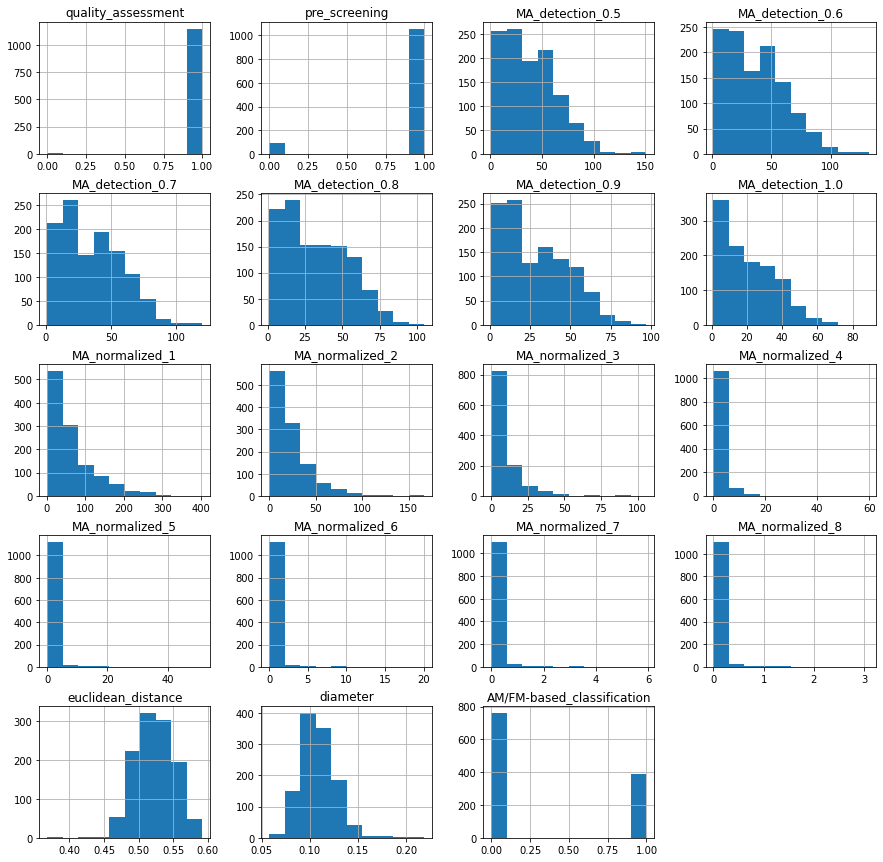

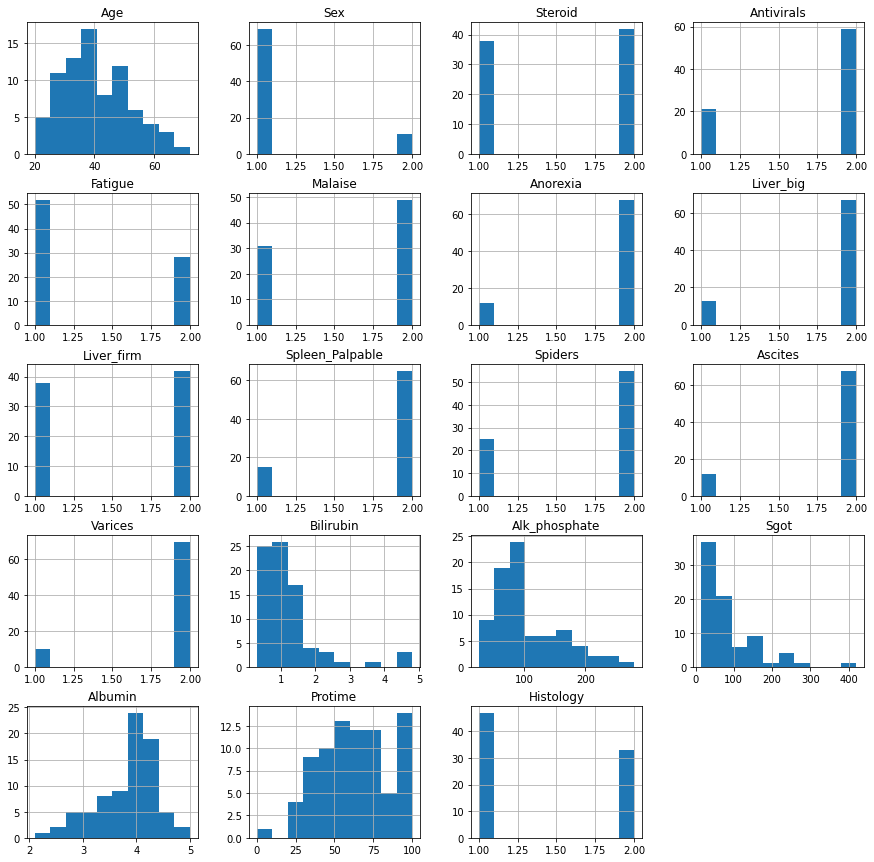

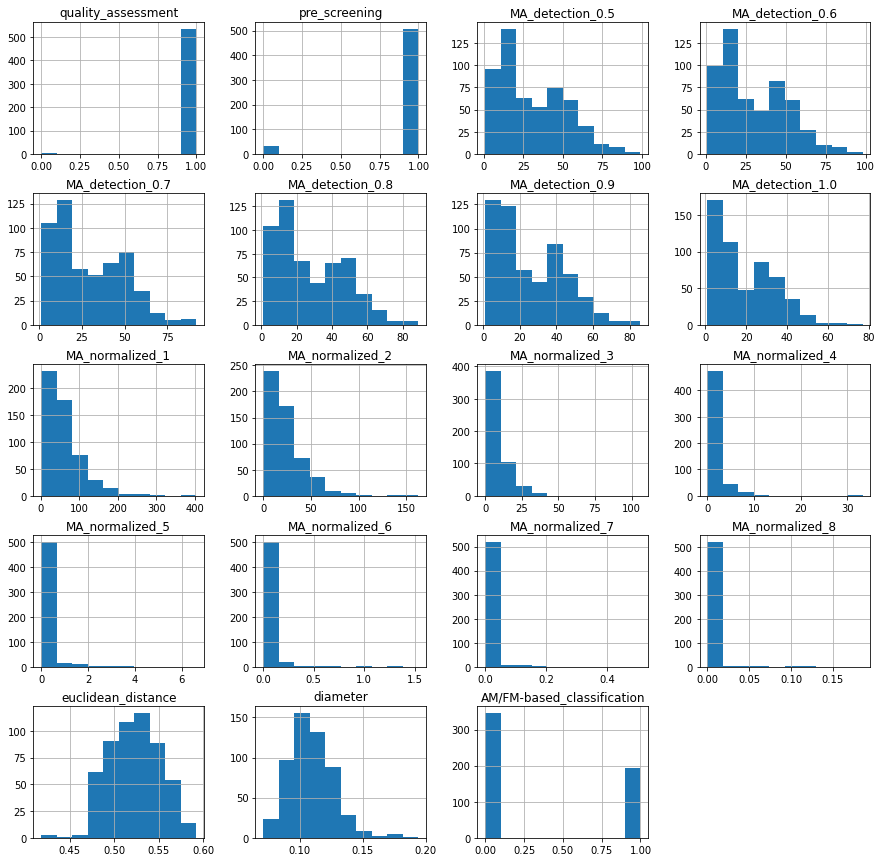

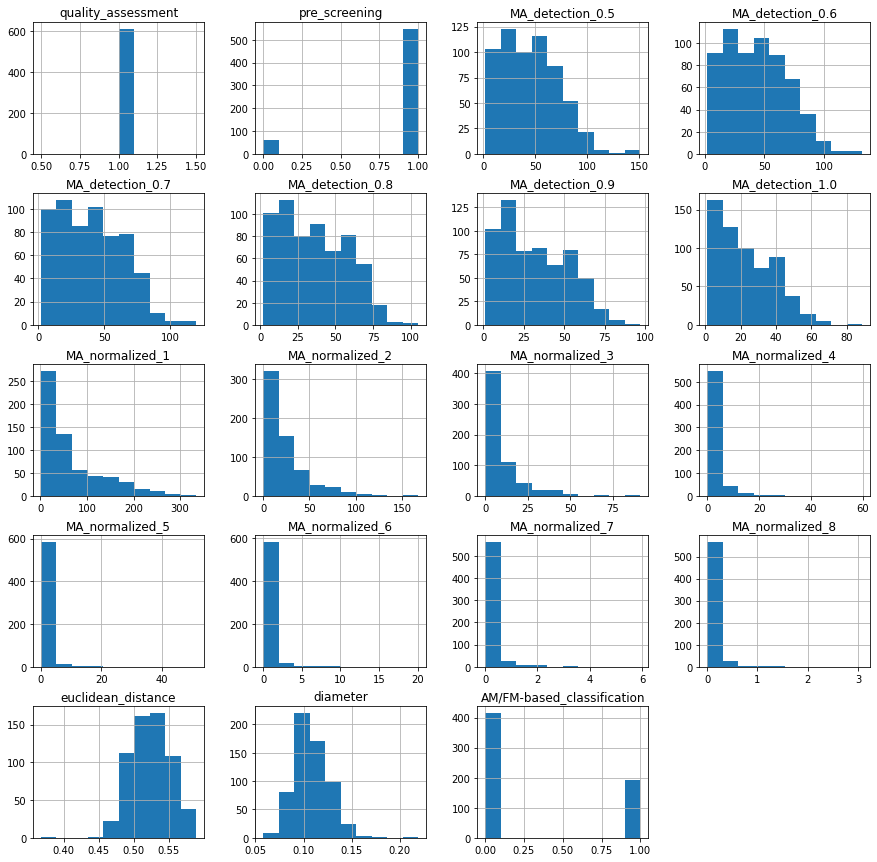

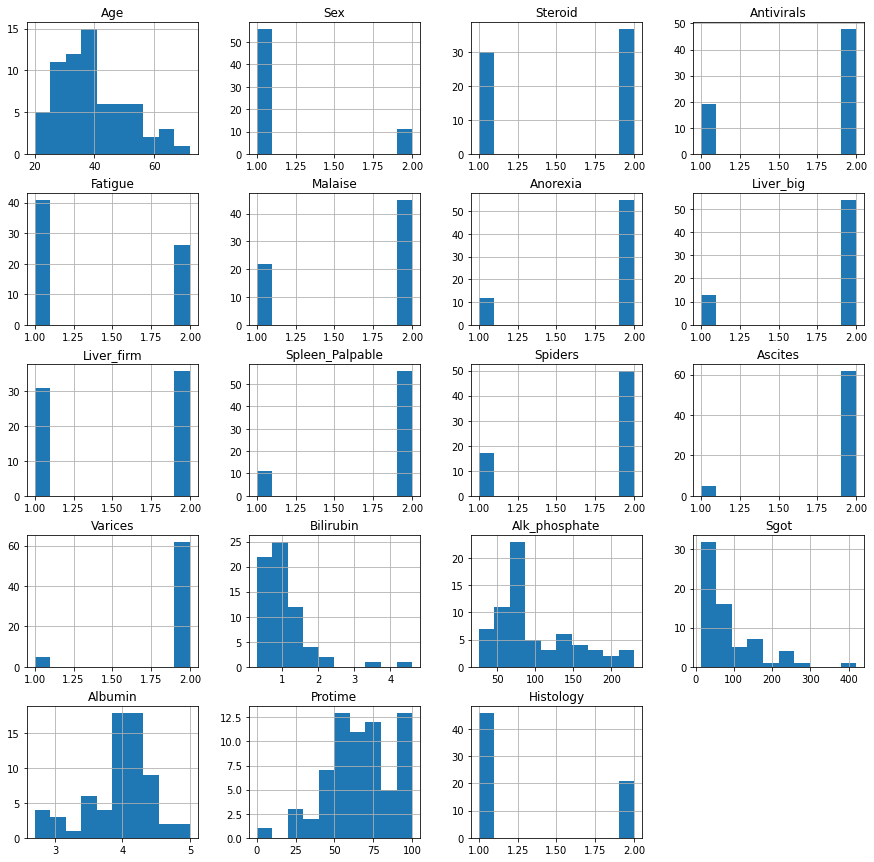

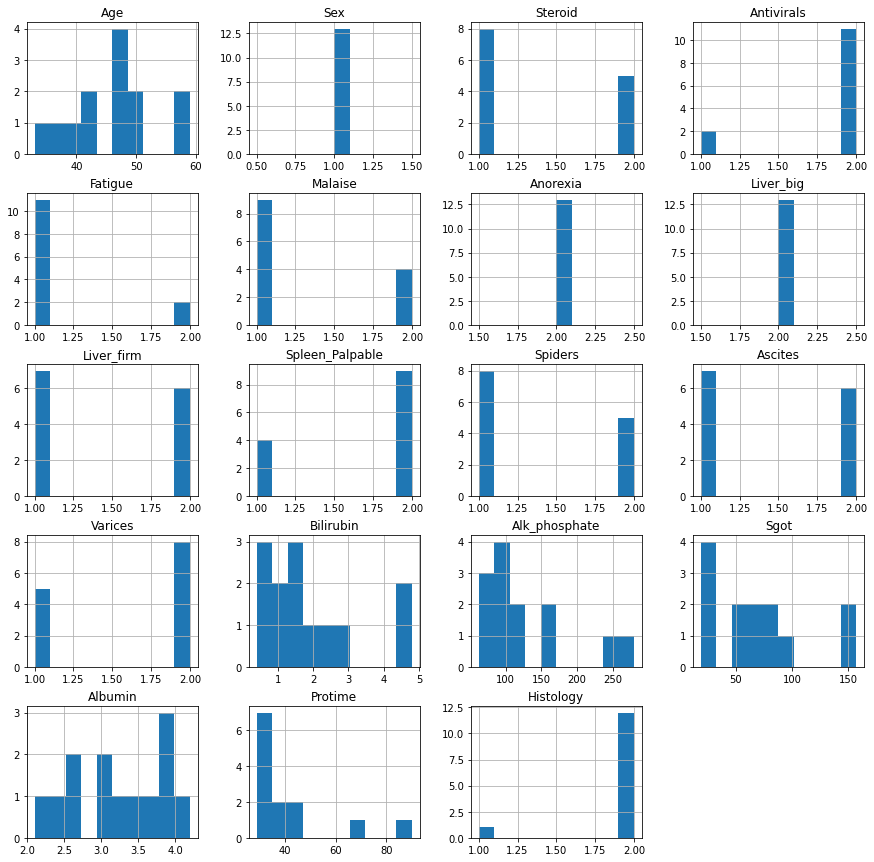

In [ ]:
# distribution of features for entire 2 frames
hist_total_1 = df.iloc[:,1:].hist(figsize = (15,15))
hist_total_2 = df2.iloc[:,1:].hist(figsize = (15,15))

# distribution of features for dataset 1
df_1 = df.loc[df['Class'] == 0]
df_2 = df.loc[df['Class'] == 1]

hist_1 = df_1.iloc[:,1:].hist(figsize = (15,15))
hist_2 = df_2.iloc[:,1:].hist(figsize = (15,15))

# distribution of features for dataset 2
df_3 = df2.loc[df2['Class'] == 0]
df_4 = df2.loc[df2['Class'] == 1]

hist_3 = df_3.iloc[:,1:].hist(figsize = (15,15))
hist_4 = df_4.iloc[:,1:].hist(figsize = (15,15))

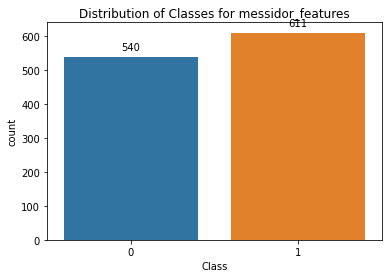

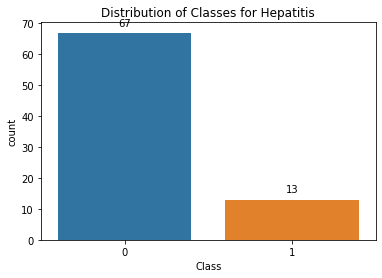

In [ ]:
# distribution of classes 
ax = sns.countplot(x='Class', data=pd.DataFrame(df, columns=['Class']), order=[0, 1])
ax.set_title("Distribution of Classes for messidor_features")
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

ax = sns.countplot(x='Class', data=pd.DataFrame(df2, columns=['Class']), order=[0, 1])
ax.set_title("Distribution of Classes for Hepatitis")
ax.set_xticklabels(ax.get_xticklabels())
for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# KNN implementation

## Dataset preparation
For KNN train/test data, it is dangerous to combine discrete features and continuous features. This is because difference in discrete features will have distance of 1, where as difference in continuous features can have arbitrary distance. This will cause continuous features to weigh more than discrete features, which is not desirable.

In remedy the distance difference, one of the solutions is to normalize the continuous features to between [0, 1], so that the continuous features will not weigh more than categorical features.

`df_normalized` and `df2_normalized` are the two preprocessed datasets. We first seperate them into feature matrix `x1, x2` and label vector `y1, y2`, then we split them into training sets and test sets by a ratio about 2:1.
To visualize the data in 2D plot, we select two continuous features as the two axis for each dataset.

In [6]:
# normalized data 
def min_max_normalize(x):
  normalized = (x-min(x))/(max(x)-min(x))
  return normalized

df_normalized = df.copy()
df2_normalized = df2.copy()
df_normalized = df.apply(min_max_normalize)
df2_normalized = df2.apply(min_max_normalize)
display(df_normalized.head())
df2_normalized.head()

,Class,quality_assessment,pre_screening,MA_detection_0.5,MA_detection_0.6,MA_detection_0.7,MA_detection_0.8,MA_detection_0.9,MA_detection_1.0,MA_normalized_1,MA_normalized_2,MA_normalized_3,MA_normalized_4,MA_normalized_5,MA_normalized_6,MA_normalized_7,MA_normalized_8,euclidean_distance,diameter,AM/FM-based_classification
0,0.0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,0.0,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,0.0,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
5,0.0,0.269231,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.133333,0.271654,0.034483,0.655172,0.75,0.0
10,0.0,0.365385,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.222222,0.204724,0.039409,0.793103,0.85,0.0
11,0.0,0.230769,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.155556,0.129921,0.578818,0.551724,0.54,0.0
12,0.0,0.403846,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.133333,0.216535,0.113300,0.620690,0.52,0.0
13,0.0,0.192308,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.422222,0.122047,0.320197,0.965517,0.78,0.0


Dataset 1: 
 instances(N1) 	 1151 
 features(D1) 	 19 
 classes(C1) 	 2 



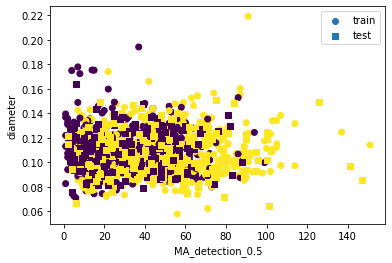

Dataset 2: 
 instances(N2) 	 80 
 features(D2) 	 19 
 classes(C2) 	 2 



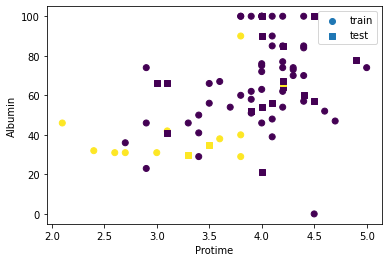

In [7]:
## dataset 1 
x1, y1 = df_normalized.iloc[:, 1:].to_numpy(), df_normalized.Class.to_numpy()
y1 = y1.astype(int)
(N1, D1), C1 = x1.shape, np.max(y1) + 1
print(f'Dataset 1: \n instances(N1) \t {N1} \n features(D1) \t {D1} \n classes(C1) \t {C1} \n')

inds = np.random.permutation(N1)
ts1 = 800  # size of training set
x1_train, y1_train = x1[inds[:ts1]], y1[inds[:ts1]]
x1_test, y1_test = x1[inds[ts1:]], y1[inds[ts1:]]

# visualization of the data
# select 'MA_detection_0.5' as x axis and 'diameter' as y axis
x1_plot = df[['MA_detection_0.5', 'diameter']].to_numpy()
plt.scatter(x1_plot[inds[:ts1], 0], x1_plot[inds[:ts1], 1], c=y1_train, marker='o', label='train')
plt.scatter(x1_plot[inds[ts1:], 0], x1_plot[inds[ts1:], 1], c=y1_test, marker='s', label='test')
plt.legend()
plt.ylabel('diameter')
plt.xlabel('MA_detection_0.5')
plt.show()


## dataset 2
x2, y2 = df2_normalized.iloc[:, 1:].to_numpy(), df2_normalized.Class.to_numpy()
y2 = y2.astype(int)
(N2, D2), C2 = x2.shape, np.max(y2) + 1
print(f'Dataset 2: \n instances(N2) \t {N2} \n features(D2) \t {D2} \n classes(C2) \t {C2} \n')

inds = np.random.permutation(N2)
ts2 = 60  # size of training set 
x2_train, y2_train = x2[inds[:ts2]], y2[inds[:ts2]]
x2_test, y2_test = x2[inds[ts2:]], y2[inds[ts2:]]

# visualization of the data
# select 'Age' as x axis and 'Protime' as y axis
x2_plot = df2[['Albumin', 'Protime']].to_numpy()
plt.scatter(x2_plot[inds[:ts2], 0], x2_plot[inds[:ts2], 1], c=y2_train, marker='o', label='train')
plt.scatter(x2_plot[inds[ts2:], 0], x2_plot[inds[ts2:], 1], c=y2_test, marker='s', label='test')
plt.legend()
plt.ylabel('Albumin')
plt.xlabel('Protime')
plt.show()

From the plot we find that the negative and positive points of dataset 1 do not have a clear boundary, so KNN may performs badly on this dataset.

## The KNN class
We implement our models as python classes. Three class methods are `fit`, `predict`and `evaluate_acc`; which respectively perform training by fitting the data, making prediction on new data and calculating accuracy. In the `__init__` function, we initialize our model, usually this includes an assignment to *hyper-parameters*, which are K value and distance function in KNN.

In [8]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2) ** 2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
hamming = lambda x1, x2: np.sum(x1 == x2, axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn=euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        """ Store the training data using this method as it is a lazy learner"""
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self

    def predict(self, x_test):
        """ Makes a prediction using the stored training data and the test data given as argument"""
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None, :, :], x_test[:, None, :])
        # ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        # ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i, :] = np.argsort(distances[i])[:self.K]
            y_prob[i, :] = np.bincount(self.y[knns[i, :]], minlength=self.C)
        # simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

    def evaluate_acc(self, y_test, y_pred):
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0] * 100
        return accuracy


## Experiments on dataset 1
In this section we perform 3 experiments on dataset 1


1. Test different K values and see how it affects the training data accuracy and test data accuracy
2. Try out different distance functions (euccliden, manhattan and hamming)
3. Present a plot of the decision boundary
4. Explore how dropping some features will affect the model


Dataset1: K = 1
trainning accuracy is 100.0 
testing accuracy is 58.7 

Dataset1: K = 6
trainning accuracy is 72.1 
testing accuracy is 61.8 

Dataset1: K = 11
trainning accuracy is 70.5 
testing accuracy is 62.4 

Dataset1: K = 16
trainning accuracy is 68.0 
testing accuracy is 63.2 

Dataset1: K = 21
trainning accuracy is 69.0 
testing accuracy is 64.1 

Dataset1: K = 26
trainning accuracy is 68.0 
testing accuracy is 63.5 

Dataset1: K = 31
trainning accuracy is 68.0 
testing accuracy is 63.0 

Dataset1: K = 36
trainning accuracy is 67.0 
testing accuracy is 63.0 



<function matplotlib.pyplot.show>

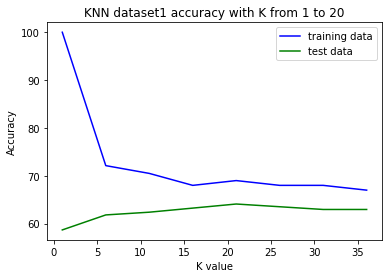

In [9]:
def train_model(x_train, y_train, x_test, y_test, k, fn):
    model = KNN(K=k, dist_fn=fn)
    y_prob, knns = model.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(y_prob, axis=-1)
    accuracy = model.evaluate_acc(y_test, y_pred)
    return accuracy


## Test different K values with euclidean distance function
train_acc_array = []
test_acc_array = []
for i in range(1, 40, 5):
    print("Dataset1: K =", i)
    train_acc = train_model(x1_train, y1_train, x1_train, y1_train, i, euclidean)
    train_acc_array.append(train_acc)
    print(f'trainning accuracy is {train_acc:.1f} ')
    test_acc = train_model(x1_train, y1_train, x1_test, y1_test, i, euclidean)
    test_acc_array.append(test_acc)
    print(f'testing accuracy is {test_acc:.1f} \n')

x_coor =list(range(1,40,5))
plt.plot(x_coor,train_acc_array,'b',label="training data")
plt.plot(x_coor,test_acc_array,'g',label="test data")
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.legend(("training data","test data"),loc='upper right')
plt.title('KNN dataset1 accuracy with K from 1 to 20')
plt.show

In [10]:
# try different distance functions
print("Distance function is manhattan:")
for i in range(1, 40, 6):
    test_acc = train_model(x1_train, y1_train, x1_test, y1_test, i, manhattan)
    print(f'K= {i}, testing accuracy is {test_acc:.1f}')

print("\nDistance function is hamming:")
for i in range(1, 40, 6):
    test_acc = train_model(x1_train, y1_train, x1_test, y1_test, i, hamming)
    print(f'K= {i}, testing accuracy is {test_acc:.1f}')

Distance function is manhattan:
K= 1, testing accuracy is 61.0
K= 7, testing accuracy is 65.5
K= 13, testing accuracy is 64.4
K= 19, testing accuracy is 63.5
K= 25, testing accuracy is 63.2
K= 31, testing accuracy is 63.2
K= 37, testing accuracy is 63.8

Distance function is hamming:
K= 1, testing accuracy is 51.3
K= 7, testing accuracy is 45.6
K= 13, testing accuracy is 47.6
K= 19, testing accuracy is 46.4
K= 25, testing accuracy is 43.3
K= 31, testing accuracy is 44.7
K= 37, testing accuracy is 45.0


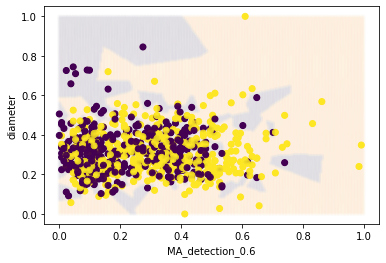

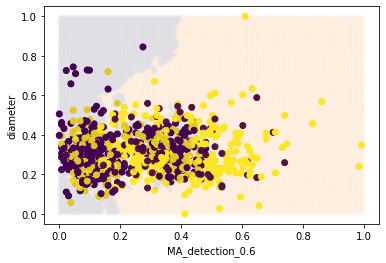

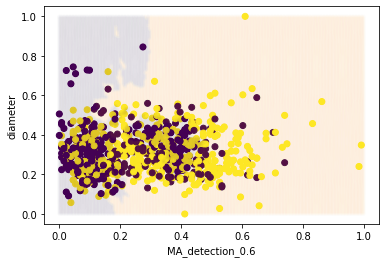

In [74]:
# draw decision boundary
# Similarly to before, to visualize in 2D plot, we just selecr two specific features
x0v = np.linspace(np.min(x1[:,2]), np.max(x1[:,17]), 200)
x1v = np.linspace(np.min(x1[:,2]), np.max(x1[:,17]), 200)
 
a, b = np.meshgrid(x0v, x1v)
x1_all = np.vstack((a.ravel(),b.ravel())).T

for k in [1,20,40]:
  model = KNN(K=k)

  x11 = x1_train[:, [3,17]]
  y_prob_all, _ = model.fit(x11, y1_train).predict(x1_all)
  y_pred_all = np.argmax(y_prob_all,axis=-1)

  plt.scatter(x11[:, 0], x11[:, 1], c=y1_train, marker='o', alpha=1)
  plt.scatter(x1_all[:,0], x1_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.ylabel('diameter')
  plt.xlabel('MA_detection_0.6')
  plt.show()

In [ ]:
df.corr()

,Class,quality_assessment,pre_screening,MA_detection_0.5,MA_detection_0.6,MA_detection_0.7,MA_detection_0.8,MA_detection_0.9,MA_detection_1.0,MA_normalized_1,MA_normalized_2,MA_normalized_3,MA_normalized_4,MA_normalized_5,MA_normalized_6,MA_normalized_7,MA_normalized_8,euclidean_distance,diameter,AM/FM-based_classification
Class,1.000000,0.062816,-0.076925,0.292603,0.266338,0.234691,0.197511,0.161631,0.127861,0.058015,0.000479,0.038281,0.104254,0.142273,0.151424,0.184772,0.177313,0.008466,-0.030868,-0.042144
quality_assessment,0.062816,1.000000,-0.017611,0.035576,0.035929,0.033395,0.036506,0.034817,0.031889,0.063597,0.063061,0.044449,0.027656,0.013336,0.011864,0.012695,0.012289,-0.021943,-0.067325,-0.051723
pre_screening,-0.076925,-0.017611,1.000000,0.053300,0.054839,0.053056,0.059063,0.060557,0.060152,0.062930,0.052453,0.053534,0.041607,0.015900,0.018950,0.023268,0.023861,0.004751,-0.079577,0.010782
MA_detection_0.5,0.292603,0.035576,0.053300,1.000000,0.996177,0.985730,0.963149,0.925274,0.859620,-0.229653,-0.103047,-0.044650,0.103035,0.134464,0.142917,0.196550,0.208422,0.000001,0.033992,-0.344317
MA_detection_0.6,0.266338,0.035929,0.054839,0.996177,1.000000,0.994221,0.977030,0.944504,0.883511,-0.244704,-0.115253,-0.058364,0.086486,0.117895,0.124198,0.172633,0.185645,0.001953,0.034714,-0.360716
MA_detection_0.7,0.234691,0.033395,0.053056,0.985730,0.994221,1.000000,0.991821,0.968676,0.916198,-0.283188,-0.139111,-0.086595,0.057769,0.094513,0.098859,0.140774,0.156441,0.000387,0.030396,-0.389384
MA_detection_0.8,0.197511,0.036506,0.059063,0.963149,0.977030,0.991821,1.000000,0.988294,0.947860,-0.309950,-0.160011,-0.109946,0.029768,0.067477,0.069797,0.102638,0.119405,0.001520,0.016854,-0.411806
MA_detection_0.9,0.161631,0.034817,0.060557,0.925274,0.944504,0.968676,0.988294,1.000000,0.974577,-0.349811,-0.197279,-0.152578,-0.020469,0.022265,0.024959,0.050579,0.070735,-0.001725,0.010961,-0.437036
MA_detection_1.0,0.127861,0.031889,0.060152,0.859620,0.883511,0.916198,0.947860,0.974577,1.000000,-0.375506,-0.223681,-0.181197,-0.058153,-0.012400,-0.012175,0.006868,0.031520,-0.002557,-0.011607,-0.435127
MA_normalized_1,0.058015,0.063597,0.062930,-0.229653,-0.244704,-0.283188,-0.309950,-0.349811,-0.375506,1.000000,0.767091,0.763409,0.486606,0.163915,0.132227,0.114722,0.084682,-0.086155,-0.086474,0.390304


Since feature 2-7 are describing the same thing, just at different condifence levels, they are highly correlated. Having correlated features will increase the distance between points. So we just keep the one which has the highest correlation with "Class". Similar for feature 8-15. But the accuracy did not improve compared to before.

In [11]:
df_dropped = df_normalized.copy()
df_dropped = df_dropped[
        ['Class', 'quality_assessment', 'pre_screening', 'MA_detection_0.5', 'MA_normalized_7', 'euclidean_distance', 'diameter',
         'AM/FM-based_classification']]

x1, y1 = df_dropped.iloc[:, 1:].to_numpy(), df_dropped.Class.to_numpy()
y1 = y1.astype(int)
(N1, D1), C1 = x1.shape, np.max(y1) + 1
print(f'instances(N1) \t {N1} \n features(D1) \t {D1} \n classes(C1) \t {C1} \n')

inds = np.random.permutation(N1)
ts1 = 800  # size of training set
x1_train, y1_train = x1[inds[:ts1]], y1[inds[:ts1]]
x1_test, y1_test = x1[inds[ts1:]], y1[inds[ts1:]]

for i in range(5, 40, 5):
    print("Dataset1: K =", i)
    train_acc = train_model(x1_train, y1_train, x1_train, y1_train, i, euclidean)
    print(f'trainning accuracy is {train_acc:.1f} ')
    test_acc = train_model(x1_train, y1_train, x1_test, y1_test, i, euclidean)
    print(f'testing accuracy is {test_acc:.1f} \n')


instances(N1) 	 1151 
 features(D1) 	 7 
 classes(C1) 	 2 

Dataset1: K = 5
trainning accuracy is 73.0 
testing accuracy is 59.8 

Dataset1: K = 10
trainning accuracy is 69.8 
testing accuracy is 62.7 

Dataset1: K = 15
trainning accuracy is 67.4 
testing accuracy is 59.8 

Dataset1: K = 20
trainning accuracy is 65.4 
testing accuracy is 61.0 

Dataset1: K = 25
trainning accuracy is 67.1 
testing accuracy is 59.5 

Dataset1: K = 30
trainning accuracy is 68.2 
testing accuracy is 59.8 

Dataset1: K = 35
trainning accuracy is 67.5 
testing accuracy is 61.5 



## Experiments on dataset 2
In this section we perform 3 experiments on dataset 2

1. Test different K values and see how it affects the training data accuracy and test data accuracy
2. Try out different distance functions
3. Present a plot of the decision boundary

Dataset2: K = 1
trainning accuracy is 100.0 
testing accuracy is 85.0 

Dataset2: K = 3
trainning accuracy is 85.0 
testing accuracy is 90.0 

Dataset2: K = 5
trainning accuracy is 88.3 
testing accuracy is 90.0 

Dataset2: K = 7
trainning accuracy is 88.3 
testing accuracy is 95.0 

Dataset2: K = 9
trainning accuracy is 88.3 
testing accuracy is 90.0 

Dataset2: K = 11
trainning accuracy is 88.3 
testing accuracy is 90.0 

Dataset2: K = 13
trainning accuracy is 86.7 
testing accuracy is 90.0 

Dataset2: K = 15
trainning accuracy is 85.0 
testing accuracy is 85.0 

Dataset2: K = 17
trainning accuracy is 85.0 
testing accuracy is 85.0 

Dataset2: K = 19
trainning accuracy is 83.3 
testing accuracy is 85.0 



<function matplotlib.pyplot.show>

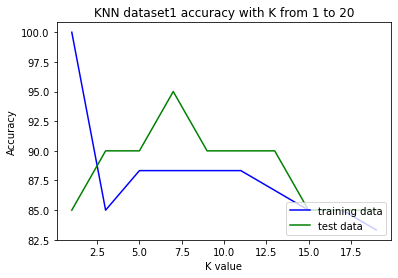

In [99]:
## Test different K values with euclidean distance function
train_acc_array = []
test_acc_array = []
for i in range(1,20,2):
    print("Dataset2: K =", i)
    train_acc = train_model(x2_train, y2_train, x2_train, y2_train, i, euclidean)
    train_acc_array.append(train_acc)
    print(f'trainning accuracy is {train_acc:.1f} ')
    test_acc = train_model(x2_train, y2_train, x2_test, y2_test, i, euclidean)
    test_acc_array.append(test_acc)
    print(f'testing accuracy is {test_acc:.1f} \n')

x_coor =list(range(1,20,2))
plt.plot(x_coor,train_acc_array,'b',label="training data")
plt.plot(x_coor,test_acc_array,'g',label="test data")
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.legend(("training data","test data"),loc='lower right')
plt.title('KNN dataset1 accuracy with K from 1 to 20')
plt.show

In [100]:
# try different distance functions
print("Distance function is manhattan:")
for i in range(1, 10, 2):
    test_acc = train_model(x2_train, y2_train, x2_test, y2_test, i, manhattan)
    print(f'K= {i}, testing accuracy is {test_acc:.1f}')

print("\nDistance function is hamming:")
for i in range(1, 10, 2):
    test_acc = train_model(x2_train, y2_train, x2_test, y2_test, i, hamming)
    print(f'K= {i}, testing accuracy is {test_acc:.1f}')

Distance function is manhattan:
K= 1, testing accuracy is 85.0
K= 3, testing accuracy is 90.0
K= 5, testing accuracy is 90.0
K= 7, testing accuracy is 95.0
K= 9, testing accuracy is 90.0

Distance function is hamming:
K= 1, testing accuracy is 75.0
K= 3, testing accuracy is 85.0
K= 5, testing accuracy is 85.0
K= 7, testing accuracy is 85.0
K= 9, testing accuracy is 85.0


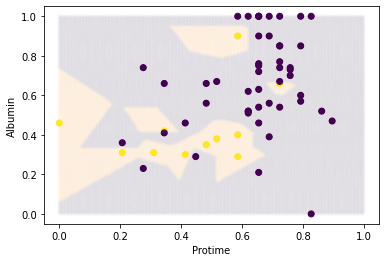

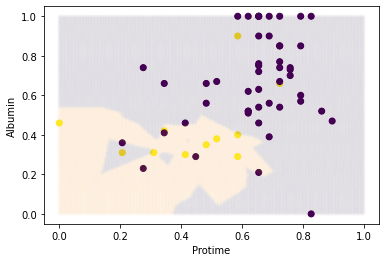

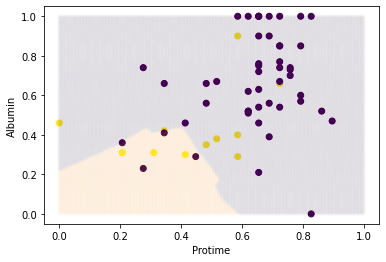

In [ ]:
# draw decision boundary
# Similarly to before, to visualize in 2D plot, we just selecr two specific features
x0v = np.linspace(np.min(x2[:,16]), np.max(x2[:,17]), 200)
x1v = np.linspace(np.min(x2[:,16]), np.max(x2[:,17]), 200)
 
a, b = np.meshgrid(x0v, x1v)
x2_all = np.vstack((a.ravel(),b.ravel())).T

for k in [1,5,15]:
  model = KNN(K=k)

  x22 = x2_train[:, [16,17]]
  y_prob_all, _ = model.fit(x22, y2_train).predict(x2_all)
  y_pred_all = np.argmax(y_prob_all,axis=-1)

  plt.scatter(x22[:, 0], x22[:, 1], c=y2_train, marker='o', alpha=1)
  plt.scatter(x2_all[:,0], x2_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.ylabel('Albumin')
  plt.xlabel('Protime')
  plt.show()

# Decesion Tree implementation

In [23]:
## dataset 1 
x1, y1 = df.iloc[:, 1:].to_numpy(), df.Class.to_numpy()
y1 = y1.astype(int)
(N1, D1), C1 = x1.shape, np.max(y1) + 1
print(f'Dataset 1: \n instances(N1) \t {N1} \n features(D1) \t {D1} \n classes(C1) \t {C1} \n')

inds = np.random.permutation(N1)
ts1 = 800  # size of training set
x1_train, y1_train = x1[inds[:ts1]], y1[inds[:ts1]]
x1_test, y1_test = x1[inds[ts1:]], y1[inds[ts1:]]


##
x2, y2 = df2.iloc[:, 1:].to_numpy(), df2.Class.to_numpy()
y2 = y2.astype(int)
(N2, D2), C2 = x2.shape, np.max(y2) + 1
print(f'Dataset 2: \n instances(N2) \t {N2} \n features(D2) \t {D2} \n classes(C2) \t {C2} \n')

inds = np.random.permutation(N2)
ts2 = 60  # size of training set 
x2_train, y2_train = x2[inds[:ts2]], y2[inds[:ts2]]
x2_test, y2_test = x2[inds[ts2:]], y2[inds[ts2:]]

Dataset 1: 
 instances(N1) 	 1151 
 features(D1) 	 19 
 classes(C1) 	 2 

Dataset 2: 
 instances(N2) 	 80 
 features(D2) 	 19 
 classes(C2) 	 2 



## The DT class

In [24]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value


#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2



class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree


def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict


def evaluate_acc(self,y_pred,y_real):
  
    accuracy = np.sum(y_pred==y_real)/y_real.shape[0]*100
    return accuracy

## Model training
Here we trained the DT model with different maximum tree depth to find the best hyper-parameter. We also tried out three cost functions, namely misclassification, entropy and Gini index.

In [25]:
# dataset 1
print('dataset1 test')

# misclassification cost function
print('\n''decision tree test with misclassification cost function:')

train1_misc =[] #list contain training accuracy of this method
test1_misc = [] #list contain testing accuracy of this method
best_accuracy_mis_train1 = [0,0] #the best train accuracy and its tree depth
best_accuracy_mis_test1 = [0,0] #the best test accuracy and its tree depth  

for tree_depth in range(1,31):
  tree = DecisionTree(max_depth=tree_depth,cost_fn=cost_misclassification)

  probs_train = tree.fit(x1_train, y1_train).predict(x1_train)
  probs_test = tree.fit(x1_train, y1_train).predict(x1_test)

  y_pred = np.argmax(probs_test,1)
  y_pred1 = np.argmax(probs_train,1)

  test_accuracy = np.sum(y_pred == y1_test)/y1_test.shape[0]
  test1_misc.append(test_accuracy)

  train_accuracy = np.sum(y_pred1 == y1_train)/y1_train.shape[0]
  train1_misc.append(train_accuracy)

  if  test_accuracy > best_accuracy_mis_test1[0]:
    best_accuracy_mis_test1[0] = test_accuracy
    best_accuracy_mis_test1[1] = tree_depth

  if train_accuracy > best_accuracy_mis_train1[0]:
    best_accuracy_mis_train1[0] = train_accuracy
    best_accuracy_mis_train1[1] = tree_depth 

print(f'testing accuracy is {best_accuracy_mis_test1[0]*100:.1f},''with tree depth ',best_accuracy_mis_test1[1]) 
print(f'trainging accuracy is {best_accuracy_mis_train1[0]*100:.1f},''with tree depth ',best_accuracy_mis_train1[1])


# entropy cost function
print('\n''decision tree test with entropy cost function:')

train1_enc =[] #list contain training accuracy of this method
test1_enc = [] #list contain testing accuracy of this method
best_accuracy_en_train1 = [0,0] #the best train accuracy and its tree depth
best_accuracy_en_test1 = [0,0] #the best test accuracy and its tree depth  
 
for tree_depth in range(1,31):
  tree = DecisionTree(max_depth=tree_depth,cost_fn=cost_entropy)

  probs_train = tree.fit(x1_train, y1_train).predict(x1_train)
  probs_test = tree.fit(x1_train, y1_train).predict(x1_test)

  y_pred = np.argmax(probs_test,1)
  y_pred1 = np.argmax(probs_train,1)

  test_accuracy = np.sum(y_pred == y1_test)/y1_test.shape[0]
  test1_enc.append(test_accuracy)

  train_accuracy = np.sum(y_pred1 == y1_train)/y1_train.shape[0]
  train1_enc.append(train_accuracy) 

  if  test_accuracy > best_accuracy_en_test1[0]:
    best_accuracy_en_test1[0] = test_accuracy
    best_accuracy_en_test1[1] = tree_depth

  if train_accuracy > best_accuracy_en_train1[0]:
    best_accuracy_en_train1[0] = train_accuracy
    best_accuracy_en_train1[1] = tree_depth 

print(f'testing accuracy is {best_accuracy_en_test1[0]*100:.1f},''with tree depth ',best_accuracy_en_test1[1]) 
print(f'trainging accuracy is {best_accuracy_en_train1[0]*100:.1f},''with tree depth ',best_accuracy_en_train1[1])


# Gini index function
print('\n''decision tree test with Gini index function:')

train1_gic =[] #list contain training accuracy of this method
test1_gic = [] #list contain testing accuracy of this method
best_accuracy_gi_train1 = [0,0] #the best train accuracy and its tree depth
best_accuracy_gi_test1 = [0,0] #the best test accuracy and its tree depth  

for tree_depth in range(1,31):
  tree = DecisionTree(max_depth=tree_depth,cost_fn=cost_gini_index)

  probs_train = tree.fit(x1_train, y1_train).predict(x1_train)
  probs_test = tree.fit(x1_train, y1_train).predict(x1_test)

  y_pred = np.argmax(probs_test,1)
  y_pred1 = np.argmax(probs_train,1)

  test_accuracy = np.sum(y_pred == y1_test)/y1_test.shape[0]
  test1_gic.append(test_accuracy)

  train_accuracy = np.sum(y_pred1 == y1_train)/y1_train.shape[0]
  train1_gic.append(train_accuracy) 

  if  test_accuracy > best_accuracy_gi_test1[0]:
    best_accuracy_gi_test1[0] = test_accuracy
    best_accuracy_gi_test1[1] = tree_depth

  if train_accuracy > best_accuracy_gi_train1[0]:
    best_accuracy_gi_train1[0] = train_accuracy
    best_accuracy_gi_train1[1] = tree_depth 

print(f'testing accuracy is {best_accuracy_gi_test1[0]*100:.1f},''with tree depth ',best_accuracy_gi_test1[1]) 
print(f'trainging accuracy is {best_accuracy_gi_train1[0]*100:.1f},''with tree depth ',best_accuracy_gi_train1[1])

dataset1 test

decision tree test with misclassification cost function:
testing accuracy is 68.9,with tree depth  11
trainging accuracy is 100.0,with tree depth  30

decision tree test with entropy cost function:
testing accuracy is 66.7,with tree depth  6
trainging accuracy is 100.0,with tree depth  25

decision tree test with Gini index function:
testing accuracy is 67.2,with tree depth  11
trainging accuracy is 100.0,with tree depth  26


In [26]:
#dataset2
print('dataset2 test')

# misclassification cost function
print('\n''decision tree test with misclassification cost function:')

train2_misc =[] #list contain training accuracy of this method
test2_misc = [] #list contain testing accuracy of this method
best_accuracy_mis_train2 = [0,0] #the best train accuracy and its tree depth
best_accuracy_mis_test2 = [0,0] #the best test accuracy and its tree depth   

for tree_depth in range(1,31):
  tree = DecisionTree(max_depth=tree_depth,cost_fn=cost_misclassification)

  probs_test = tree.fit(x2_train, y2_train).predict(x2_test)
  probs_train = tree.fit(x2_train, y2_train).predict(x2_train)

  y_pred = np.argmax(probs_test,1)
  y_pred1 = np.argmax(probs_train,1)

  test_accuracy = np.sum(y_pred == y2_test)/y2_test.shape[0]
  test2_misc.append(test_accuracy)

  train_accuracy = np.sum(y_pred1 == y2_train)/y2_train.shape[0]
  train2_misc.append(train_accuracy)  

  if  test_accuracy > best_accuracy_mis_test2[0]:
    best_accuracy_mis_test2[0] = test_accuracy
    best_accuracy_mis_test2[1] = tree_depth

  if train_accuracy > best_accuracy_mis_train2[0]:
    best_accuracy_mis_train2[0] = train_accuracy
    best_accuracy_mis_train2[1] = tree_depth 

print(f'testing accuracy is {best_accuracy_mis_test2[0]*100:.1f},''with tree depth ',best_accuracy_mis_test2[1]) 
print(f'trainging accuracy is {best_accuracy_mis_train2[0]*100:.1f},''with tree depth ',best_accuracy_mis_train2[1])


# entropy cost function
print('\n''decision tree test with entropy cost function:')

train2_enc =[] #list contain training accuracy of this method
test2_enc = [] #list contain testing accuracy of this method
best_accuracy_en_train2 = [0,0] #the best train accuracy and its tree depth
best_accuracy_en_test2 = [0,0] #the best test accuracy and its tree depth  

for tree_depth in range(1,31):
  tree = DecisionTree(max_depth=tree_depth,cost_fn=cost_entropy)

  probs_test = tree.fit(x2_train, y2_train).predict(x2_test)
  probs_train = tree.fit(x2_train, y2_train).predict(x2_train)

  y_pred = np.argmax(probs_test,1)
  y_pred1 = np.argmax(probs_train,1)

  test_accuracy = np.sum(y_pred == y2_test)/y2_test.shape[0]
  test2_enc.append(test_accuracy)

  train_accuracy = np.sum(y_pred1 == y2_train)/y2_train.shape[0]
  train2_enc.append(train_accuracy) 


  if  test_accuracy > best_accuracy_en_test2[0]:
    best_accuracy_en_test2[0] = test_accuracy
    best_accuracy_en_test2[1] = tree_depth

  if train_accuracy > best_accuracy_en_train2[0]:
    best_accuracy_en_train2[0] = train_accuracy
    best_accuracy_en_train2[1] = tree_depth 

print(f'testing accuracy is {best_accuracy_en_test2[0]*100:.1f},''with tree depth ',best_accuracy_en_test2[1]) 
print(f'trainging accuracy is {best_accuracy_en_train2[0]*100:.1f},''with tree depth ',best_accuracy_en_train2[1])


# Gini index function
print('\n''decision tree test with Gini index function:')

train2_gic =[] #list contain training accuracy of this method
test2_gic = [] #list contain testing accuracy of this method
best_accuracy_gi_train2 = [0,0] #the best train accuracy and its tree depth
best_accuracy_gi_test2 = [0,0] #the best test accuracy and its tree depth  

for tree_depth in range(1,31):
  tree = DecisionTree(max_depth=tree_depth,cost_fn=cost_gini_index)

  probs_test = tree.fit(x2_train, y2_train).predict(x2_test)
  probs_train = tree.fit(x2_train, y2_train).predict(x2_train)

  y_pred = np.argmax(probs_test,1)
  y_pred1 = np.argmax(probs_train,1)

  test_accuracy = np.sum(y_pred == y2_test)/y2_test.shape[0]
  test2_gic.append(test_accuracy)

  train_accuracy = np.sum(y_pred1 == y2_train)/y2_train.shape[0]
  train2_gic.append(train_accuracy) 

  if  test_accuracy > best_accuracy_gi_test2[0]:
    best_accuracy_gi_test2[0] = test_accuracy
    best_accuracy_gi_test2[1] = tree_depth

  if train_accuracy > best_accuracy_gi_train2[0]:
    best_accuracy_gi_train2[0] = train_accuracy
    best_accuracy_gi_train2[1] = tree_depth 

print(f'testing accuracy is {best_accuracy_gi_test2[0]*100:.1f},''with tree depth ',best_accuracy_gi_test2[1]) 
print(f'trainging accuracy is {best_accuracy_gi_train2[0]*100:.1f},''with tree depth ',best_accuracy_gi_train2[1])

dataset2 test

decision tree test with misclassification cost function:
testing accuracy is 90.0,with tree depth  4
trainging accuracy is 100.0,with tree depth  9

decision tree test with entropy cost function:
testing accuracy is 90.0,with tree depth  3
trainging accuracy is 100.0,with tree depth  7

decision tree test with Gini index function:
testing accuracy is 95.0,with tree depth  4
trainging accuracy is 100.0,with tree depth  4


## Results visualizing

<function matplotlib.pyplot.show>

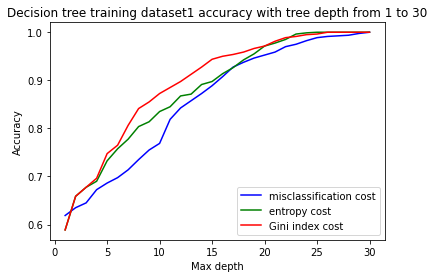

In [27]:
#visualizing

x_coor =list(range(1,31,1))
plt.plot(x_coor,train1_misc,'b',label="misclassification cost")
plt.plot(x_coor,train1_enc,'g',label="entropy cost")
plt.plot(x_coor,train1_gic,'r',label="Gini index cost")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend(("misclassification cost","entropy cost","Gini index cost"),loc='lower right')
plt.title('Decision tree training dataset1 accuracy with tree depth from 1 to 30')
plt.show


<function matplotlib.pyplot.show>

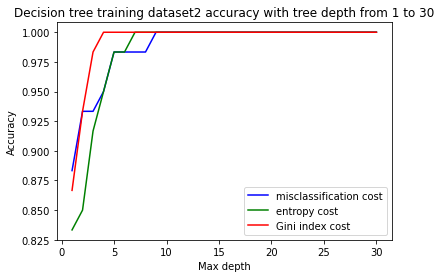

In [29]:
plt.plot(x_coor,train2_misc,'b',label="misclassification cost")
plt.plot(x_coor,train2_enc,'g',label="entropy cost")
plt.plot(x_coor,train2_gic,'r',label="Gini index cost")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend(("misclassification cost","entropy cost","Gini index cost"),loc='lower right')
plt.title('Decision tree training dataset2 accuracy with tree depth from 1 to 30')
plt.show

<function matplotlib.pyplot.show>

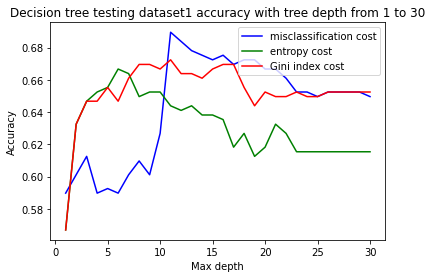

In [30]:
plt.plot(x_coor,test1_misc,'b',label="misclassification cost")
plt.plot(x_coor,test1_enc,'g',label="entropy cost")
plt.plot(x_coor,test1_gic,'r',label="Gini index cost")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend(("misclassification cost","entropy cost","Gini index cost"),loc='upper right')
plt.title('Decision tree testing dataset1 accuracy with tree depth from 1 to 30')
plt.show


<function matplotlib.pyplot.show>

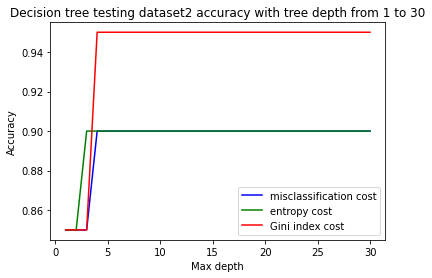

In [34]:
plt.plot(x_coor,test2_misc,'b',label="misclassification cost")
plt.plot(x_coor,test2_enc,'g',label="entropy cost")
plt.plot(x_coor,test2_gic,'r',label="Gini index cost")
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend(("misclassification cost","entropy cost","Gini index cost"),loc='lower right')
plt.title('Decision tree testing dataset2 accuracy with tree depth from 1 to 30')
plt.show

## Decision boundray

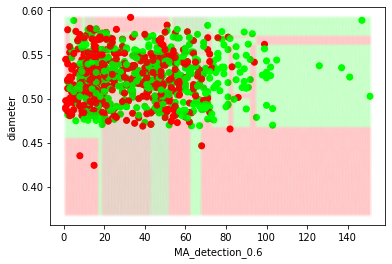

In [49]:
# Decision boundray for messidor
df1_np = df.to_numpy()
x1 = df1_np[:, [3,17]]
y1 = df1_np[:,0]
y1 = y1.astype(int)

(num_instances, num_features), num_classes = x1.shape, len(np.unique(y1, axis=0))
inds = np.random.permutation(num_instances)

x1_train, y1_train = x1[inds[:800]], y1[inds[:800]]
x1_test, y1_test = x1[inds[800:]], y1[inds[800:]]

x0v = np.linspace(np.min(x1[:,0]), np.max(x1[:,0]),200)
x1v = np.linspace(np.min(x1[:,1]), np.max(x1[:,1]),200)
x0, x1 = np.meshgrid(x0v,x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


tree1 = DecisionTree(max_depth=11)#choose the best depth because it get best result in above test.
y_train_prob = np.zeros((y1_train.shape[0], 3))
# need to set to 3 because need 3 channels for RGBA
y_train_prob[np.arange(y1_train.shape[0]), y1_train.astype(int)] = 1
y_prob_all = tree1.fit(x1_train, y1_train).predict(x_all)
b = np.zeros((y_prob_all.shape[0], 1))
y_prob_all = np.concatenate((y_prob_all, b), axis=1)

plt.scatter(x1_train[:,0], x1_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=0.02)
plt.ylabel('diameter')
plt.xlabel('MA_detection_0.6')
plt.show()
plt.show()

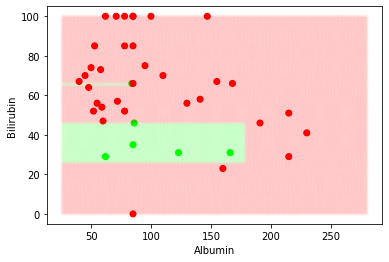

In [48]:
# decision boundary for hepatitis
df2_np = df2.to_numpy() 
x2 = df2_np[:,1:]
y2 = df2_np[:,0]
y2 = y2.astype(int)
(N2, D2), C2 = x2.shape, np.max(y2)+1

inds = np.random.permutation(N2)

x2_train, y2_train = x2[inds[:40]], y2[inds[:40]]
x2_test, y2_test = x2[inds[40:]], y2[inds[40:]]

#decision boundary for DT
x2 = df2_np[:, [15,18]]
y2 = df2_np[:,0]
y2 = y2.astype(int)

(num_instances, num_features), num_classes = x2.shape, len(np.unique(y2, axis=0))
inds = np.random.permutation(num_instances)

x2_train, y2_train = x2[inds[:40]], y2[inds[:40]]
x2_test, y2_test = x2[inds[40:]], y2[inds[40:]]

x0v = np.linspace(np.min(x2[:,0]), np.max(x2[:,0]),200)
x1v = np.linspace(np.min(x2[:,1]), np.max(x2[:,1]),200)
x0, x1 = np.meshgrid(x0v,x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


tree2 = DecisionTree(max_depth=4)#choose 4 because it get best result in above test.
y_train_prob = np.zeros((y2_train.shape[0], 3))
# need to set to 3 because need 3 channels for RGBA
y_train_prob[np.arange(y2_train.shape[0]), y2_train.astype(int)] = 1
y_prob_all = tree2.fit(x2_train, y2_train).predict(x_all)
b = np.zeros((y_prob_all.shape[0], 1))
y_prob_all = np.concatenate((y_prob_all, b), axis=1)

plt.scatter(x2_train[:,0], x2_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=0.02)
plt.ylabel('Bilirubin')
plt.xlabel('Albumin')
plt.show()

## Cross validation

In [102]:
def accuracy(pred, real):
  accuracy = np.sum(pred == real)/real.shape[0]
  return accuracy

def cross_validate(n, n_folds=5):
    #get the number of data samples in each split
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds

x1, y1 = df.iloc[:, 1:].to_numpy(), df.Class.to_numpy()
y1 = y1.astype(int)
x2, y2 = df2.iloc[:, 1:].to_numpy(), df2.Class.to_numpy()
y2 = y2.astype(int)

CV for dataset1 
do 90% and 50% split

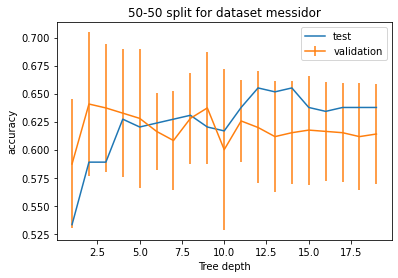

best accuracy: 0.6550522648083623 with tree depth 12


In [52]:
num_folds = 10
(num_instances, num_features), num_classes = x1.shape, np.max(y1)+1

n_test = num_instances//4
n_valid = num_instances//4
#train:valid:test = 2:1:1 (train using 50%)

inds = np.random.permutation(num_instances)
x_test, y_test = x1[inds[:n_test]], y1[inds[:n_test]]
x_rest, y_rest = x1[inds[n_test:]], y1[inds[n_test:]]
n_rest = num_instances - n_test


#Plot the accuracy difference for different values stored in list
depth_list = range(1,20)
num_folds = 5
best_acc = [0,0]
acc_test, acc_valid = np.zeros(len(depth_list)), np.zeros((len(depth_list), num_folds))
for i, depth in enumerate(depth_list):
    #Find the validation for num_folds splits for a given number
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        tree = DecisionTree(max_depth = depth,cost_fn=cost_entropy)
        tree = tree.fit(x_rest[tr], y_rest[tr])
        acc_valid[i, f] = accuracy(y_rest[val], np.argmax(tree.predict(x_rest[val]),1))
    tree = DecisionTree(max_depth = depth)
    tree = tree.fit(x_rest, y_rest)
    acc_test[i]= accuracy(y_test, np.argmax(tree.predict(x_test),1))
    if best_acc[0] < accuracy(y_test, np.argmax(tree.predict(x_test),1)):
      best_acc[0] = accuracy(y_test, np.argmax(tree.predict(x_test),1))
      best_acc[1] = depth
    
plt.plot(depth_list, acc_test,  label='test')
plt.errorbar(depth_list, np.mean(acc_valid, axis=1), np.std(acc_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('accuracy')
plt.title('50-50 split for dataset messidor')
plt.show()
print('best accuracy:', best_acc[0], 'with tree depth', best_acc[1])

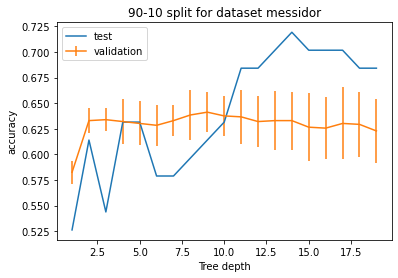

best accuracy: 0.7192982456140351 with tree depth 14


In [53]:
num_folds = 10
(num_instances, num_features), num_classes = x1.shape, np.max(y1)+1

n_test = num_instances//20
n_valid = num_instances//20
#train:valid:test = 18:1:1 (train using 90%)

inds = np.random.permutation(num_instances)
x_test, y_test = x1[inds[:n_test]], y1[inds[:n_test]]
x_rest, y_rest = x1[inds[n_test:]], y1[inds[n_test:]]
n_rest = num_instances - n_test

depth_list = range(1,20)
num_folds = 5
best_acc = [0,0]
acc_test, acc_valid = np.zeros(len(depth_list)), np.zeros((len(depth_list), num_folds))
for i, depth in enumerate(depth_list):
    
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        tree = DecisionTree(max_depth = depth,cost_fn=cost_entropy)
        tree = tree.fit(x_rest[tr], y_rest[tr])
        acc_valid[i, f] = accuracy(y_rest[val], np.argmax(tree.predict(x_rest[val]),1))
    tree = DecisionTree(max_depth = depth)
    tree = tree.fit(x_rest, y_rest)
    acc_test[i]= accuracy(y_test, np.argmax(tree.predict(x_test),1))
    if best_acc[0] < accuracy(y_test, np.argmax(tree.predict(x_test),1)):
      best_acc[0] = accuracy(y_test, np.argmax(tree.predict(x_test),1))
      best_acc[1] = depth
    
plt.plot(depth_list, acc_test,  label='test')
plt.errorbar(depth_list, np.mean(acc_valid, axis=1), np.std(acc_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('accuracy')
plt.title('90-10 split for dataset messidor')
plt.show()
print('best accuracy:', best_acc[0], 'with tree depth', best_acc[1])

CT for dataset hepatitis do 90% and 50% split

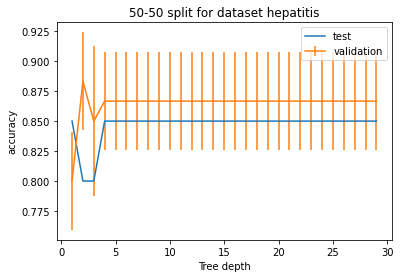

best accuracy: 0.85 with tree depth 1


In [103]:
num_folds = 10
(num_instances, num_features), num_classes = x2.shape, np.max(y1)+1

n_test = num_instances//4
n_valid = num_instances//4
# means train:valid:test = 2:1:1 (train using 50%)

inds = np.random.permutation(num_instances)
x_test, y_test = x2[inds[:n_test]], y2[inds[:n_test]]
x_rest, y_rest = x2[inds[n_test:]], y2[inds[n_test:]]
n_rest = num_instances - n_test


depth_list = range(1,30)
num_folds = 5
best_acc = [0,0]
acc_test, acc_valid = np.zeros(len(depth_list)), np.zeros((len(depth_list), num_folds))
for i, depth in enumerate(depth_list):
    #Find the validation for num_folds splits for a given number
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        tree = DecisionTree(max_depth = depth)
        tree = tree.fit(x_rest[tr], y_rest[tr])
        acc_valid[i, f] = accuracy(y_rest[val], np.argmax(tree.predict(x_rest[val]),1))
    tree = DecisionTree(max_depth = depth)
    tree = tree.fit(x_rest, y_rest)
    acc_test[i]= accuracy(y_test, np.argmax(tree.predict(x_test),1))
    if best_acc[0] < accuracy(y_test, np.argmax(tree.predict(x_test),1)):
      best_acc[0] = accuracy(y_test, np.argmax(tree.predict(x_test),1))
      best_acc[1] = depth
    
plt.plot(depth_list, acc_test, label='test')
plt.errorbar(depth_list, np.mean(acc_valid, axis=1), np.std(acc_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('accuracy')
plt.title('50-50 split for dataset hepatitis')
plt.show()
print('best accuracy:', best_acc[0], 'with tree depth', best_acc[1])

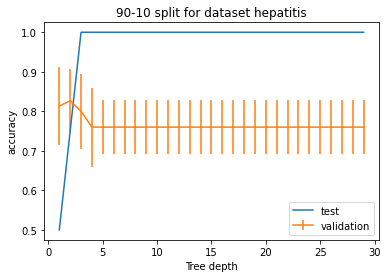

best accuracy: 1.0 with tree depth 3


In [104]:
num_folds = 10
(num_instances, num_features), num_classes = x2.shape, np.max(y1)+1

n_test = num_instances//20
n_valid = num_instances//20
#train:valid:test = 18:1:1 (train using 90%)

inds = np.random.permutation(num_instances)
x_test, y_test = x2[inds[:n_test]], y2[inds[:n_test]]
x_rest, y_rest = x2[inds[n_test:]], y2[inds[n_test:]]
n_rest = num_instances - n_test

depth_list = range(1,30)
num_folds = 5
best_acc = [0,0]
acc_test, acc_valid = np.zeros(len(depth_list)), np.zeros((len(depth_list), num_folds))
for i, depth in enumerate(depth_list):
    
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        tree = DecisionTree(max_depth = depth)
        tree = tree.fit(x_rest[tr], y_rest[tr])
        acc_valid[i, f] = accuracy(y_rest[val], np.argmax(tree.predict(x_rest[val]),1))
    tree = DecisionTree(max_depth = depth)
    tree = tree.fit(x_rest, y_rest)
    acc_test[i]= accuracy(y_test, np.argmax(tree.predict(x_test),1))
    if best_acc[0] < accuracy(y_test, np.argmax(tree.predict(x_test),1)):
      best_acc[0] = accuracy(y_test, np.argmax(tree.predict(x_test),1))
      best_acc[1] = depth
    
plt.plot(depth_list, acc_test,  label='test')
plt.errorbar(depth_list, np.mean(acc_valid, axis=1), np.std(acc_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('accuracy')
plt.title('90-10 split for dataset hepatitis')
plt.show()
print('best accuracy:', best_acc[0], 'with tree depth', best_acc[1])

## Summary



1.DT approach got better or equal accuracy compared to KNN.

2.Withing the tree depth increasing, training set accuracy always be closed to 100% but testing set accuracy may get worse performance.

3.For dataset messidor, misclassification cost function get better performance
 
 For dataset hepatitis, gini index function get better performace

4.After cross-validation, it is obviously that the testing set accuracy of dataset messidor has a significant improvemence. 

But for dataset hepatitis, it did not show much difference.It may due to the differnt sizes of dataset.

From these two experiments, we could find that cross-validation could always help us to bulit better model , espescially works well on large size dataset.



reference:https://github.com/rabbanyk/comp551-notebooks/blob/master/ModelSelection.ipynb

https://github.com/rabbanyk/comp551-notebooks/blob/master/DecisionTree.ipynb

